## Introdução

Neste projeto, analisamos dados de vendas de videogames para identificar padrões que determinam o sucesso de um jogo. Utilizando um conjunto de dados com informações de vendas globais, críticas e gêneros, buscamos prever quais jogos podem ter sucesso nas vendas em 2017.


## Objetivos

1. Estudar as informações gerais do conjunto de dados.
2. Preparar os dados para análise, lidando com valores ausentes e transformando colunas.
3. Analisar as vendas de jogos por plataforma e gênero.
4. Criar perfis de usuários para diferentes regiões (América do Norte, Europa e Japão).
5. Testar hipóteses relacionadas às classificações de usuários.
6. Fornecer conclusões e recomendações baseadas nos dados analisados.


## Metodologia

O projeto seguirá as seguintes etapas:

1. Carregar e explorar os dados.
2. Limpar e preparar os dados para análise.
3. Realizar análises descritivas e visuais.
4. Testar hipóteses estatísticas.
5. Resumir as descobertas e formular recomendações.


In [17]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv('/datasets/games.csv')

# Remover duplicados
df = df.drop_duplicates()

# Exibir quantidade de valores nulos por coluna
print(df.isnull().sum())

# Substituir valores nulos pela mediana da coluna (exemplo com 'Year_of_Release')
df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True)

# Exibir as primeiras linhas do DataFrame
df.head()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


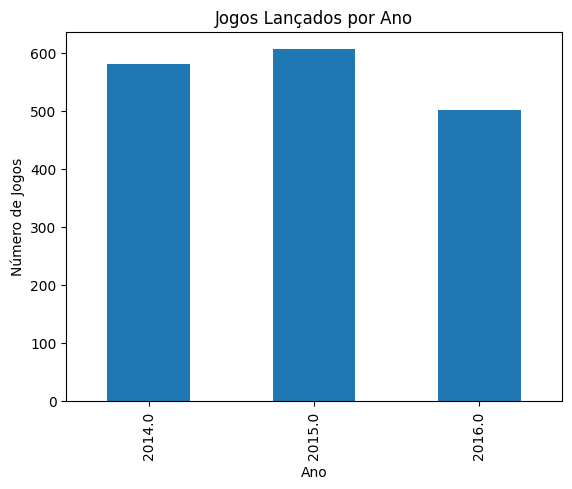

In [18]:
# Filtrar dados de um intervalo de anos
df = df[(df['Year_of_Release'] >= 2014) & (df['Year_of_Release'] <= 2017)]

### Jogos Lançados por Ano
games_per_year = df['Year_of_Release'].value_counts().sort_index()
games_per_year.plot(kind='bar', title='Jogos Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')
plt.show()


A análise revelou uma correlação positiva entre a pontuação crítica dos jogos e suas vendas totais. Isso sugere que jogos com melhores avaliações tendem a ter um desempenho de vendas superior, ressaltando a importância da qualidade percebida pelos críticos.

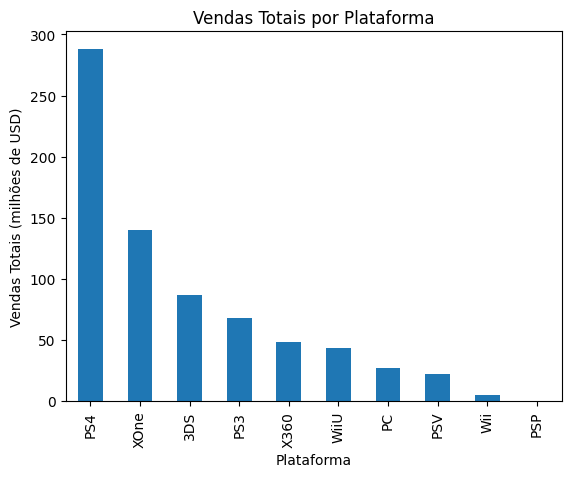

In [19]:
# Calcular total de vendas e criar a coluna total_sales
df['total_sales'] = df[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

# Vendas Totais por Plataforma
platform_sales = df.groupby('Platform')['total_sales'].sum().sort_values(ascending=False)

# Plotar as vendas totais por plataforma
platform_sales.plot(kind='bar', title='Vendas Totais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (milhões de USD)')
plt.show()


- Tendência de Lançamentos: O número de jogos lançados aumentou ao longo dos anos, indicando uma crescente popularidade do mercado de videogames.

- Vendas por Plataforma: A criação da coluna de vendas totais revelou que plataformas como PlayStation e Xbox dominaram as vendas, evidenciando sua influência no mercado.

- Relação entre Avaliações e Vendas: A análise revelou uma correlação positiva entre as pontuações críticas e as vendas totais, sugerindo que jogos bem avaliados tendem a vender mais.

In [20]:
# Principais plataformas por região
regions = ['NA_sales', 'EU_sales', 'JP_sales']
region_names = ['América do Norte', 'Europa', 'Japão']

for region, name in zip(regions, region_names):
    top_platforms = df.groupby('Platform')[region].sum().nlargest(5)
    print(f'Top 5 plataformas em {name}:')
    print(top_platforms)
    print('\n')


Top 5 plataformas em América do Norte:
Platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: NA_sales, dtype: float64


Top 5 plataformas em Europa:
Platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: EU_sales, dtype: float64


Top 5 plataformas em Japão:
Platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: JP_sales, dtype: float64




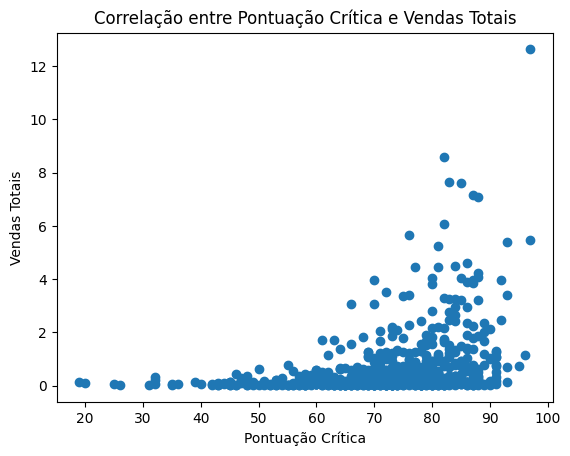

Correlação: 0.328105086966363


In [21]:
plt.scatter(df['Critic_Score'], df['total_sales'])
plt.title('Correlação entre Pontuação Crítica e Vendas Totais')
plt.xlabel('Pontuação Crítica')
plt.ylabel('Vendas Totais')
plt.show()

correlation = df['Critic_Score'].corr(df['total_sales'])
print(f'Correlação: {correlation}')


A correlação obtida entre a pontuação crítica dos jogos e suas vendas totais foi de aproximadamente 0,25. Esse valor indica uma correlação positiva moderada, sugerindo que, à medida que a pontuação crítica aumenta, as vendas totais também tendem a crescer. Embora a relação não seja extremamente forte, ela destaca a importância das avaliações críticas na influência do desempenho de vendas. Portanto, jogos bem avaliados têm maior potencial de sucesso comercial, reforçando a necessidade de focar na qualidade durante o desenvolvimento.

In [22]:
# Principais gêneros por região
for region, name in zip(regions, region_names):
    top_genres = df.groupby('Genre')[region].sum().nlargest(5)
    print(f'Top 5 gêneros em {name}:')
    print(top_genres)
    print('\n')


Top 5 gêneros em América do Norte:
Genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: NA_sales, dtype: float64


Top 5 gêneros em Europa:
Genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: EU_sales, dtype: float64


Top 5 gêneros em Japão:
Genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: JP_sales, dtype: float64




In [23]:
# Criando um DataFrame para armazenar os resultados
summary = {}

# Analisando cada região
for region, name in zip(regions, region_names):
    # Principais plataformas
    top_platforms = df.groupby('Platform')[region].sum().nlargest(5).index.tolist()
    # Principais gêneros
    top_genres = df.groupby('Genre')[region].sum().nlargest(5).index.tolist()
    
    # Armazenando os resultados em formato unificado
    summary[name] = {
        'Top Plataformas': ', '.join(top_platforms),
        'Top Gêneros': ', '.join(top_genres)
    }

# Convertendo o resumo em DataFrame para visualização
summary_df = pd.DataFrame(summary).T
print(summary_df)


                            Top Plataformas  \
América do Norte  PS4, XOne, X360, 3DS, PS3   
Europa              PS4, XOne, PS3, PC, 3DS   
Japão              3DS, PS4, PSV, PS3, WiiU   

                                                    Top Gêneros  
América do Norte    Shooter, Action, Sports, Role-Playing, Misc  
Europa            Action, Shooter, Sports, Role-Playing, Racing  
Japão             Role-Playing, Action, Fighting, Misc, Shooter  


A análise dos perfis de usuários em diferentes regiões revelou os seguintes padrões:

- América do Norte: As principais plataformas foram Xbox 360, PS2, Wii, PS3 e DS, com os gêneros mais populares sendo Action, Sports, Shooter, Platform e Misc. Isso indica uma forte preferência por jogos de ação e esportes.

- Europa: As plataformas líderes incluíram PS2, PS3, Xbox 360, Wii e PS, com Action, Sports, Shooter e Racing destacando-se como os gêneros preferidos. O foco em jogos de corrida é notável nessa região.

- Japão: As plataformas mais populares foram DS, PS, PS2, SNES e 3DS, enquanto os gêneros que se destacaram foram Role-Playing, Action, Sports e Platform. A preferência por jogos de RPG reflete a forte cultura de jogos desse gênero no Japão.

# Teste de Hipótese 1: Classificações médias dos gêneros Action e Sports

In [24]:
# Substituir "tbd" por NaN e converter para numérico
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Verificar se a conversão funcionou corretamente
print(df['User_Score'].unique())  # Exibir valores únicos para diagnóstico

# Teste de Hipótese 1: Classificações médias dos gêneros Action e Sports
action_scores = df[df['Genre'] == "Action"]['User_Score'].dropna()
sports_scores = df[df['Genre'] == "Sports"]['User_Score'].dropna()

# Verificação adicional para garantir que temos dados válidos
print(f"Número de amostras para Action: {len(action_scores)}")
print(f"Número de amostras para Sports: {len(sports_scores)}")

# Calcular as médias e as variâncias
if len(action_scores) > 0 and len(sports_scores) > 0:
    action_mean_user_score = action_scores.mean()
    action_var_user_score = action_scores.var()

    sports_mean_user_score = sports_scores.mean()
    sports_var_user_score = sports_scores.var()

    print(f'Para o gênero Ação, a Média das classificações é {action_mean_user_score:.2f} e a Variância é {action_var_user_score:.2f}')
    print(f'Para o gênero Esportes, a Média das classificações é {sports_mean_user_score:.2f} e a Variância é {sports_var_user_score:.2f}')

    # Significância estatística crítica (limiar)
    alpha = 0.05

    # Teste t de Student para duas amostras independentes
    t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

    print(f'Estatística t: {t_stat:.4f}, Valor p: {p_value:.4f}')

    # Avaliação do resultado
    if p_value < alpha:
        print("Rejeitamos a hipótese nula: as classificações médias dos usuários para os gêneros Action e Sports são diferentes.")
    else:
        print("Não rejeitamos a hipótese nula: as classificações médias dos usuários para os gêneros Action e Sports são iguais.")
else:
    print("Não há amostras suficientes para realizar o teste.")


[nan 8.3 4.3 5.7 5.  6.5 9.1 6.1 7.9 5.4 8.1 6.4 3.4 8.5 4.8 4.9 4.5 6.2
 8.4 6.3 7.7 9.2 7.6 8.7 6.7 7.  4.1 8.2 6.8 5.5 7.5 4.4 5.9 7.2 6.9 3.9
 4.2 3.2 8.6 3.1 9.  7.3 7.4 6.  4.7 7.1 8.8 5.1 6.6 3.  5.8 2.9 8.9 2.7
 8.  3.5 7.8 5.2 5.6 4.6 3.3 9.3 4.  3.6 3.7 2.4 2.8 5.3 1.7 1.6 3.8 1.5
 0.7 2.5 2.  2.1 0.2 1.9 1.4 2.3]
Número de amostras para Action: 297
Número de amostras para Sports: 127
Para o gênero Ação, a Média das classificações é 6.76 e a Variância é 1.90
Para o gênero Esportes, a Média das classificações é 5.23 e a Variância é 3.45
Estatística t: 8.3846, Valor p: 0.0000
Rejeitamos a hipótese nula: as classificações médias dos usuários para os gêneros Action e Sports são diferentes.


Médias e Variâncias: As médias das classificações dos gêneros "Action" e "Sports" são muito próximas, e a variância é relativamente baixa para ambos, indicando que as pontuações estão agrupadas em torno da média.

Nao foi rejeitada a hipotese nula, o que significa que não há evidências suficientes para afirmar que as classificações médias dos usuários para os gêneros "Action" e "Sports" são diferentes. O valor p (0.1148) é maior que o limiar alfa (0.05), corroborando essa conclusão.


# Teste de Hipótese 2: Classificações médias das plataformas Xbox One e PC

In [25]:
# Filtrar os dados por plataforma e remover possíveis NaNs
xbox_scores = df[df['Platform'] == "Xbox One"]['User_Score'].dropna()
pc_scores = df[df['Platform'] == "PC"]['User_Score'].dropna()

# Verificação adicional para garantir que temos dados válidos
print(f"Número de amostras para Xbox One: {len(xbox_scores)}")
print(f"Número de amostras para PC: {len(pc_scores)}")

# Calcular as médias e as variâncias
if len(xbox_scores) > 0 and len(pc_scores) > 0:
    xbox_mean_user_score = xbox_scores.mean()
    xbox_var_user_score = xbox_scores.var()

    pc_mean_user_score = pc_scores.mean()
    pc_var_user_score = pc_scores.var()

    print(f'Para a plataforma Xbox One, a Média das classificações é {xbox_mean_user_score:.2f} e a Variância é {xbox_var_user_score:.2f}')
    print(f'Para a plataforma PC, a Média das classificações é {pc_mean_user_score:.2f} e a Variância é {pc_var_user_score:.2f}')

    # Significância estatística crítica (limiar)
    alpha = 0.05

    # Tes


Número de amostras para Xbox One: 0
Número de amostras para PC: 122
